<center>
    <b><font size="6",color='#00759c'>LAB 6<br>Lab 4B: Foundations for Statistical Inference – Confidence Levels in SAS</font></b>
 </center>
    
  <h2><center>
    Chouliaras Andreas 2143 achouliaras@inf.uth.gr <br>
    Giannoukos Triantafyllos-Anargyros 2232 tgiannoukos@inf.uth.gr <br>
    Matzoros Christos-Konstantinos 2169 cmatzoros@inf.uth.gr <br>
 </center></h2>


### Exercise 1: Describe the distribution of your sample. What would you say is the “typical” size within your sample? Also state precisely what you interpreted “typical” to mean.



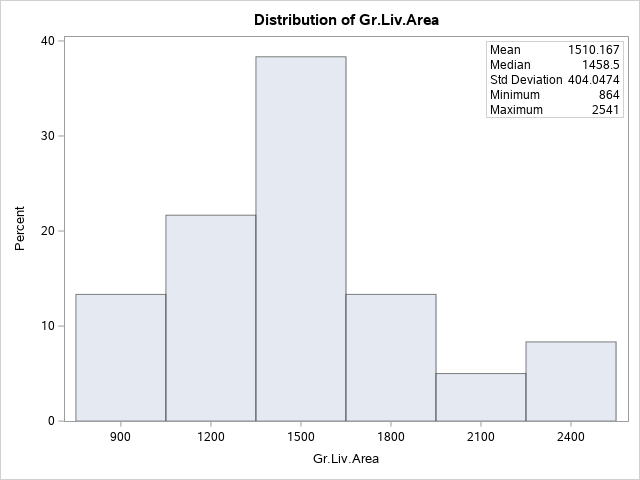

In [31]:
filename amesh url 'http://www.openintro.org/stat/data/ames_sas.csv';

proc import datafile=amesh out=work.ames dbms=csv replace;
   getnames=yes;
   guessingrows=max;
run;

/*here we take a sample of size 60*/
proc surveyselect data=work.ames out=work.amessample sampsize=60
                  method=srs ranuni;
run;

data work.amessample;
   set work.amessample;
   keep 'Gr.Liv.Area'n;
run;

proc univariate data=work.amessample;
   var 'Gr.Liv.Area'n;
   histogram 'Gr.Liv.Area'n;
   inset mean median std min max / pos=ne;
   output out=estimates n=n mean=mean std=std;
run;




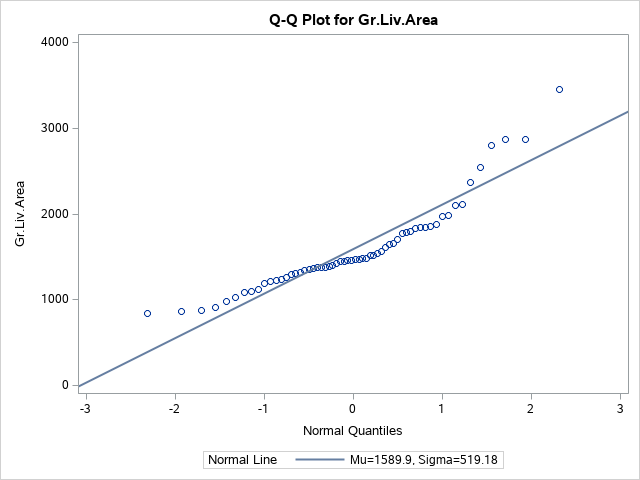

In [29]:
data _NULL_;
    set estimates;
    call symputx('n', n);
    call symputx('mean', mean);
    call symputx('std', std);
run;

ods select qqplot;
proc univariate data=work.amessample;
    var 'Gr.Liv.Area'n;
    qqplot 'Gr.Liv.Area'n / normal(mu=&mean sigma=&std);
run;




The typical size of the sample is 1500, as we can see in the histogram above.
This is confirmed by the mean of the sample, which is about 1510.
We interpreted "typical" as the histogram class with the highest frequency.

### Exercise 2: Would you expect another student’s distribution to be identical to yours? Would you expect it to be similar? Why or why not?

We would expect another student's distribution to be similar to ours, regarding the shape of the distribution, but not identical, because every sample is random.

Let's simulate another student's sample. We follow the same process as before:


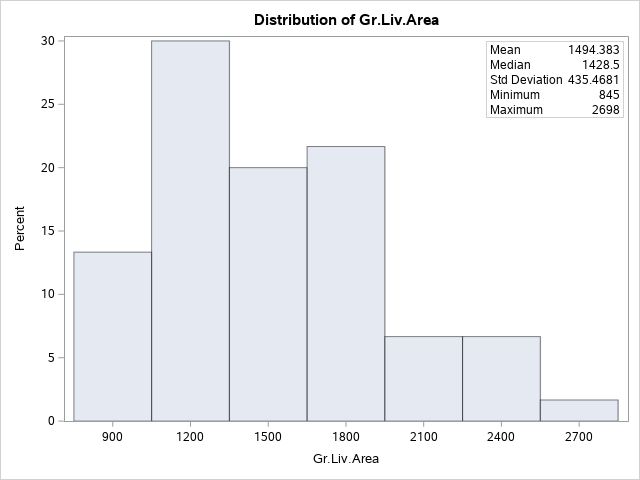

In [32]:

/*here we take another sample of size 60*/
proc surveyselect data=work.ames out=work.amessample sampsize=60
                  method=srs ranuni;
run;

data work.amessample;
   set work.amessample;
   keep 'Gr.Liv.Area'n;
run;

proc univariate data=work.amessample;
   var 'Gr.Liv.Area'n;
   histogram 'Gr.Liv.Area'n;
   inset mean median std min max / pos=ne;
   output out=estimates n=n mean=mean std=std;
run;


We observe that the distribution is similar, but not the same as before. This is expected, since the sampling is performed randomly.

## Confidence intervals

In [34]:

proc means data=work.amessample mean;
   var 'Gr.Liv.Area'n;
run;

proc means data=work.amessample mean clm alpha=0.05;
   var 'Gr.Liv.Area'n;
run;


### Exercise 3: For the confidence interval to be valid, the sample mean must be normally distributed and have standard error s/√n. What conditions must be met for this to be true?

For the statement above to be true and the sample mean to be nearly normal, some conditions have to be met. Firstly, the sample observations should be independent as well as X̅. Also, the sample size should be big enough in order for our distribution(t-distribution) to be an approximation of the normal one. The sample size should be greater than thirty(or equal to that number). Finally, the population distribution should resemble the normal distribution and not be too skewed.

### Exercise 4: What does “95% confidence” mean? If you’re not sure, see Section 4.2.2.

95% confidence interval does not mean that the probability for the mean of the population to be in that interval is 0.95. Instead, it means that for every 100 samples that we take, 95 of them will have their sample mean within that interval.

In [35]:

proc means data=work.ames mean;
   var 'Gr.Liv.Area'n;
run;

proc sql;
   select AVG('Gr.Liv.Area'n) into :popmean FROM work.ames;
run;


Analysis Variable : Gr.Liv.Area
Mean
1499.69
""
1499.69


### Exercise 5: Does your confidence interval capture the true average size of houses in Ames? If you are working on this lab in a classroom, does your neighbor’s interval capture this value?

Yes, our confidence interval capture the true average size of houses in Ames:
1381.89 < 1499.69 < 1606.88

### Exercise 6:Each student in your class should have gotten a slightly different confidence interval. What proportion of those intervals would you expect to capture the true population mean? Why? If you are working in this lab in a classroom, collect data on the intervals created by other students in the class and calculate the proportion of intervals that capture the true population mean.

We expect that 95% of the confidence intervals created by the students would include the population mean.

## On Your Own

In [66]:
proc surveyselect data=work.ames out=work.amessampler sampsize=60
                  method=srs reps=50 ranuni;
run;

proc means data=work.amessampler mean clm alpha=0.05 noprint;
   by replicate;
   var 'Gr.Liv.Area'n;
   output out=work.reprun mean=s_mean lclm=s_lower uclm=s_upper;
run;

proc print data=work.reprun;
   var s_mean s_lower s_upper;
run;


### 1.Using the following code, determine whether the true population mean was captured by the intervals. Within the DATA step, the Boolean expression will flag captured=1 when the true population mean is within the confidence limits and 0 otherwise. To determine what proportion of your confidence intervals includes the true population mean, we compute the average of this binary variable with PROC MEANS. Is this proportion exactly equal to the confidence level? If not, explain why.

In [58]:
data work.reprun;
    set work.reprun;
    captured = (s_lower le &popmean le s_upper);
run;

proc means data=work.reprun mean;
   var captured;
run;


Analysis Variable : captured
Mean
0.9400000


So the proportion of our confidence intervals that includes the true population mean is equal to 94%. This proportion is a slightly smaller than the confidence level(95%). This proportion is not necessarily the same as our confidence level but a very near approximation of it. The reason why we did not have 95% successful intervals was the randomness of the samples.

### 2. Pick a confidence level of your choosing, provided it is not 95%.

In [70]:
proc surveyselect data=work.ames out=work.amessampler sampsize=60
                  method=srs reps=50 ranuni;
run;

/*here we compute confidence intervals having a confidence level of 0.8 thus having a = 0.2*/
proc means data=work.amessampler mean clm alpha=0.15 noprint;
   by replicate;
   var 'Gr.Liv.Area'n;
   output out=work.reprun mean=s_mean lclm=s_lower uclm=s_upper;
run;



Selection Method,Simple Random Sampling
Input Data Set,AMES
Random Number Seed,223935361
Sample Size,60
Selection Probability,0.020478
Sampling Weight,48.83333
Number of Replicates,50
Total Sample Size,3000
Output Data Set,AMESSAMPLER


We chose a confidence level of 85%, so the critical value is 1,458522

### 3. Calculate 50 confidence intervals at the confidence level you chose in the previous question. Adjust the code to accommodate the confidence level you selected. Calculate the proportion of intervals that include the true population mean. How does this percentage compare to the confidence level selected for the intervals?

In [71]:
proc print data=work.reprun;
   var s_mean s_lower s_upper;
run;

data work.reprun;
    set work.reprun;
    captured = (s_lower le &popmean le s_upper);
run;

proc means data=work.reprun mean;
   var captured;
run;

Obs,s_mean,s_lower,s_upper
1,1499.7333333,1416.9184391,1582.5482276
2,1478.1166667,1400.2849459,1555.9483874
3,1463.7,1364.2955022,1563.1044978
4,1476.5666667,1376.4557243,1576.677609
5,1437.1333333,1344.375005,1529.8916617
6,1566.9333333,1465.5111543,1668.3555124
7,1527.4666667,1424.0465403,1630.886793
8,1488.1833333,1407.8448636,1568.5218031
9,1457.4166667,1366.0136815,1548.8196518
10,1416.1333333,1323.5646151,1508.7020516


The proportion of our confidence intervals that includes the true population mean is equal to 88%. This proportion is a slightly bigger than the confidence level. This proportion is not necessarily the same as our confidence level but a very near approximation of it. The reason why we did not have 85% successful intervals was the randomness of the samples.